In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
from datetime import datetime

In [31]:
# Load data
df = pd.read_csv('../data/raw/Xente_Variable_Definitions.csv')
df

,Column Name,Definition
0,TransactionId,Unique �transaction identifier on platform
1,BatchId,Unique number assigned to a batch of transacti...
2,AccountId,Unique number identifying the customer on plat...
3,SubscriptionId,Unique number identifying the customer subscri...
4,CustomerId,Unique identifier attached to Account
5,CurrencyCode,Country currency
6,CountryCode,Numerical geographical code of country
7,ProviderId,Source provider of Item �bought.
8,ProductId,Item name being bought.
9,ProductCategory,ProductIds are organized into these broader pr...


In [2]:
df1=pd.read_csv('../data/raw/data.csv')
df1

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-1000.0,1000,2019-02-13T09:54:09Z,2,0
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2019-02-13T09:54:25Z,2,0
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2019-02-13T09:54:35Z,2,0
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,ProviderId_6,ProductId_19,tv,ChannelId_3,3000.0,3000,2019-02-13T10:01:10Z,2,0


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [ ]:
df1.describe() #numerical columns description

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [95]:
# Overview of the dataset
print("Shape of the dataset:", df1.shape)
print("Data types:\n", df1.dtypes)

Shape of the dataset: (95662, 16)
Data types:
 TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object


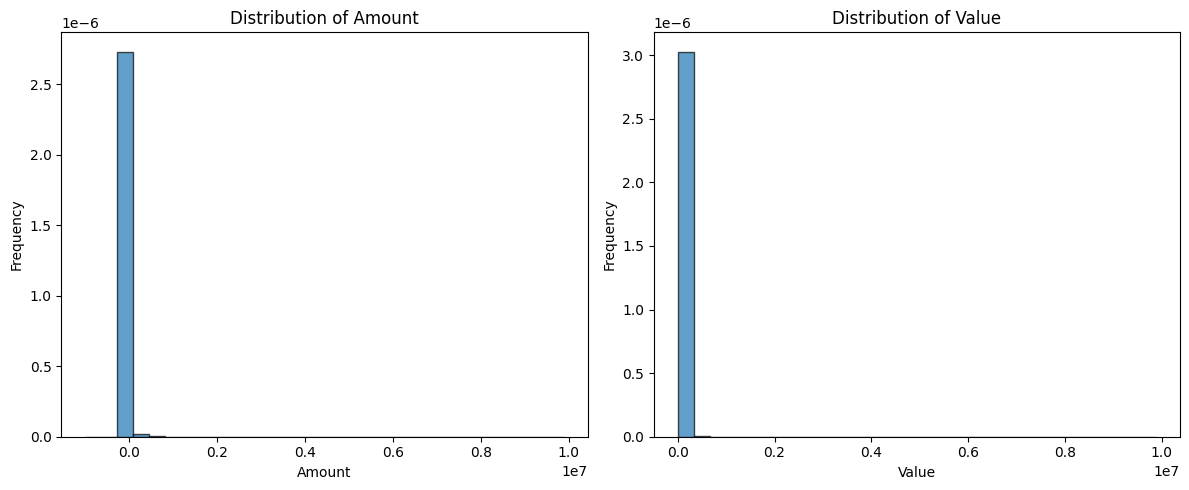

In [54]:
# 3. Numerical distributions - Using Matplotlib for histograms
num_cols = ['Amount', 'Value']
plt.figure(figsize=(12, 5))

for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 2, i)
    plt.hist(df1[col], bins=30, edgecolor='black', alpha=0.7, density=True) 

    plt.title(f'Distribution of {col}')
    plt.xlabel(col) # Add x-label for clarity
    plt.ylabel('Density' if 'density' in locals() and locals()['density'] else 'Frequency') # Adjust y-label based on density
plt.tight_layout()
plt.show()

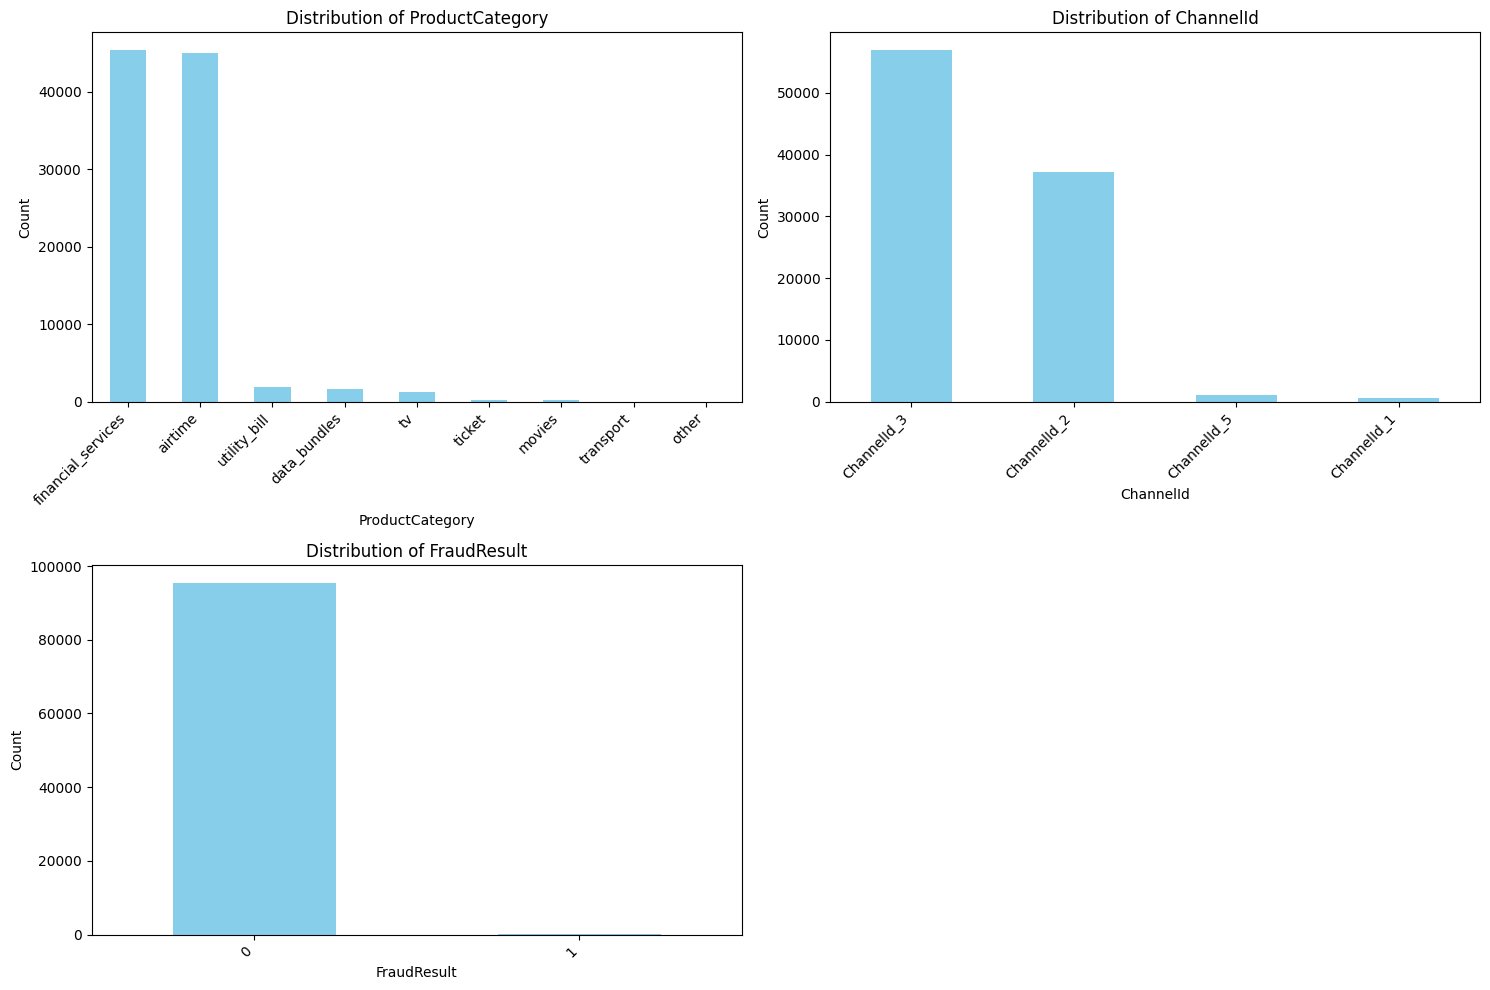

In [53]:
# 4. Categorical distributions - This part already uses Matplotlib (via pandas plot)
cat_cols = ['ProductCategory', 'ChannelId', 'FraudResult']
plt.figure(figsize=(15, 10))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 2, i)
    df1[col].value_counts().plot(kind='bar', color='skyblue') # Added a color for consistency
    plt.title(f'Distribution of {col}')
    plt.xlabel(col) # Add x-label for clarity
    plt.ylabel('Count') # Add y-label for clarity
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

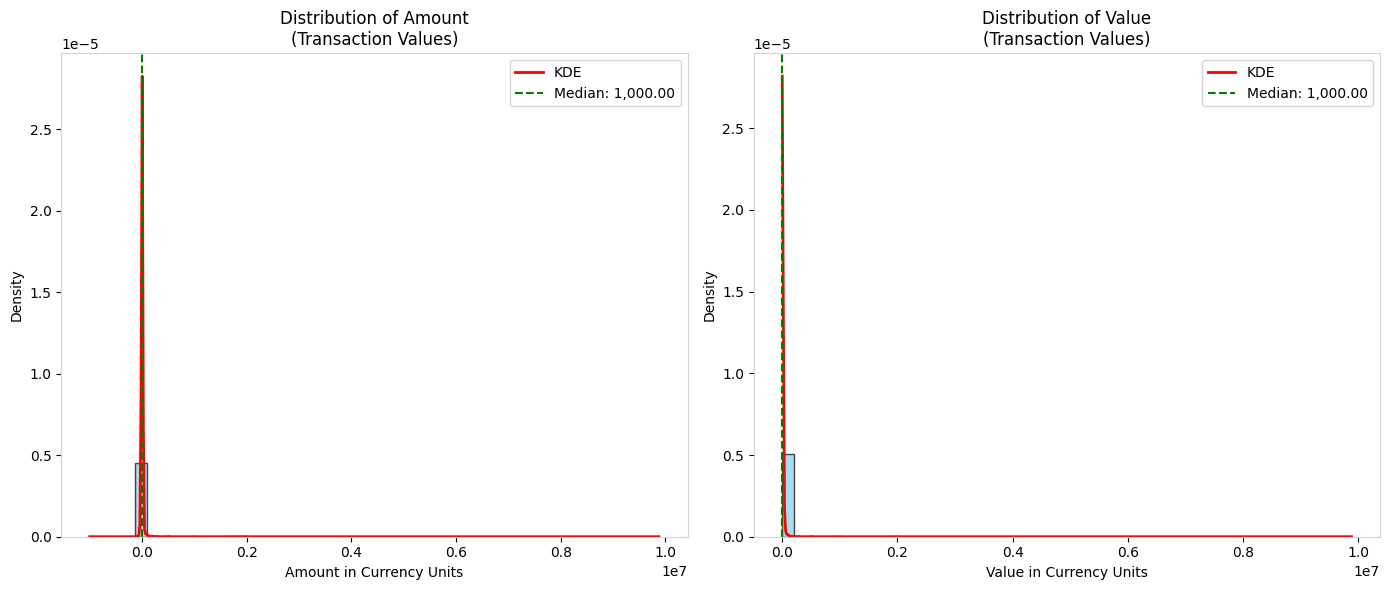

In [ ]:
# 1. Numerical distributions - Enhanced with transaction context (using Matplotlib)
num_cols = ['Amount', 'Value']
plt.figure(figsize=(14, 6))

for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 2, i)
    plt.grid(False) 
    counts, bins, patches = plt.hist(df1[col], bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='black')

    kde = gaussian_kde(df1[col].dropna()) # Drop NaN values before KDE calculation
    x_grid = np.linspace(df1[col].min(), df1[col].max(), 500)
    plt.plot(x_grid, kde(x_grid), color='red', linestyle='-', linewidth=2, label='KDE')


    plt.title(f'Distribution of {col}\n(Transaction Values)')
    plt.xlabel(col + ' in Currency Units')
    plt.ylabel('Density') # Changed to Density because of density=True in hist and KDE

    # Add median line
    median_val = df1[col].median()
    plt.axvline(median_val, color='green', linestyle='--',
                label=f'Median: {median_val:,.2f}') # Changed color for better contrast
    plt.legend()

plt.tight_layout()
plt.show()

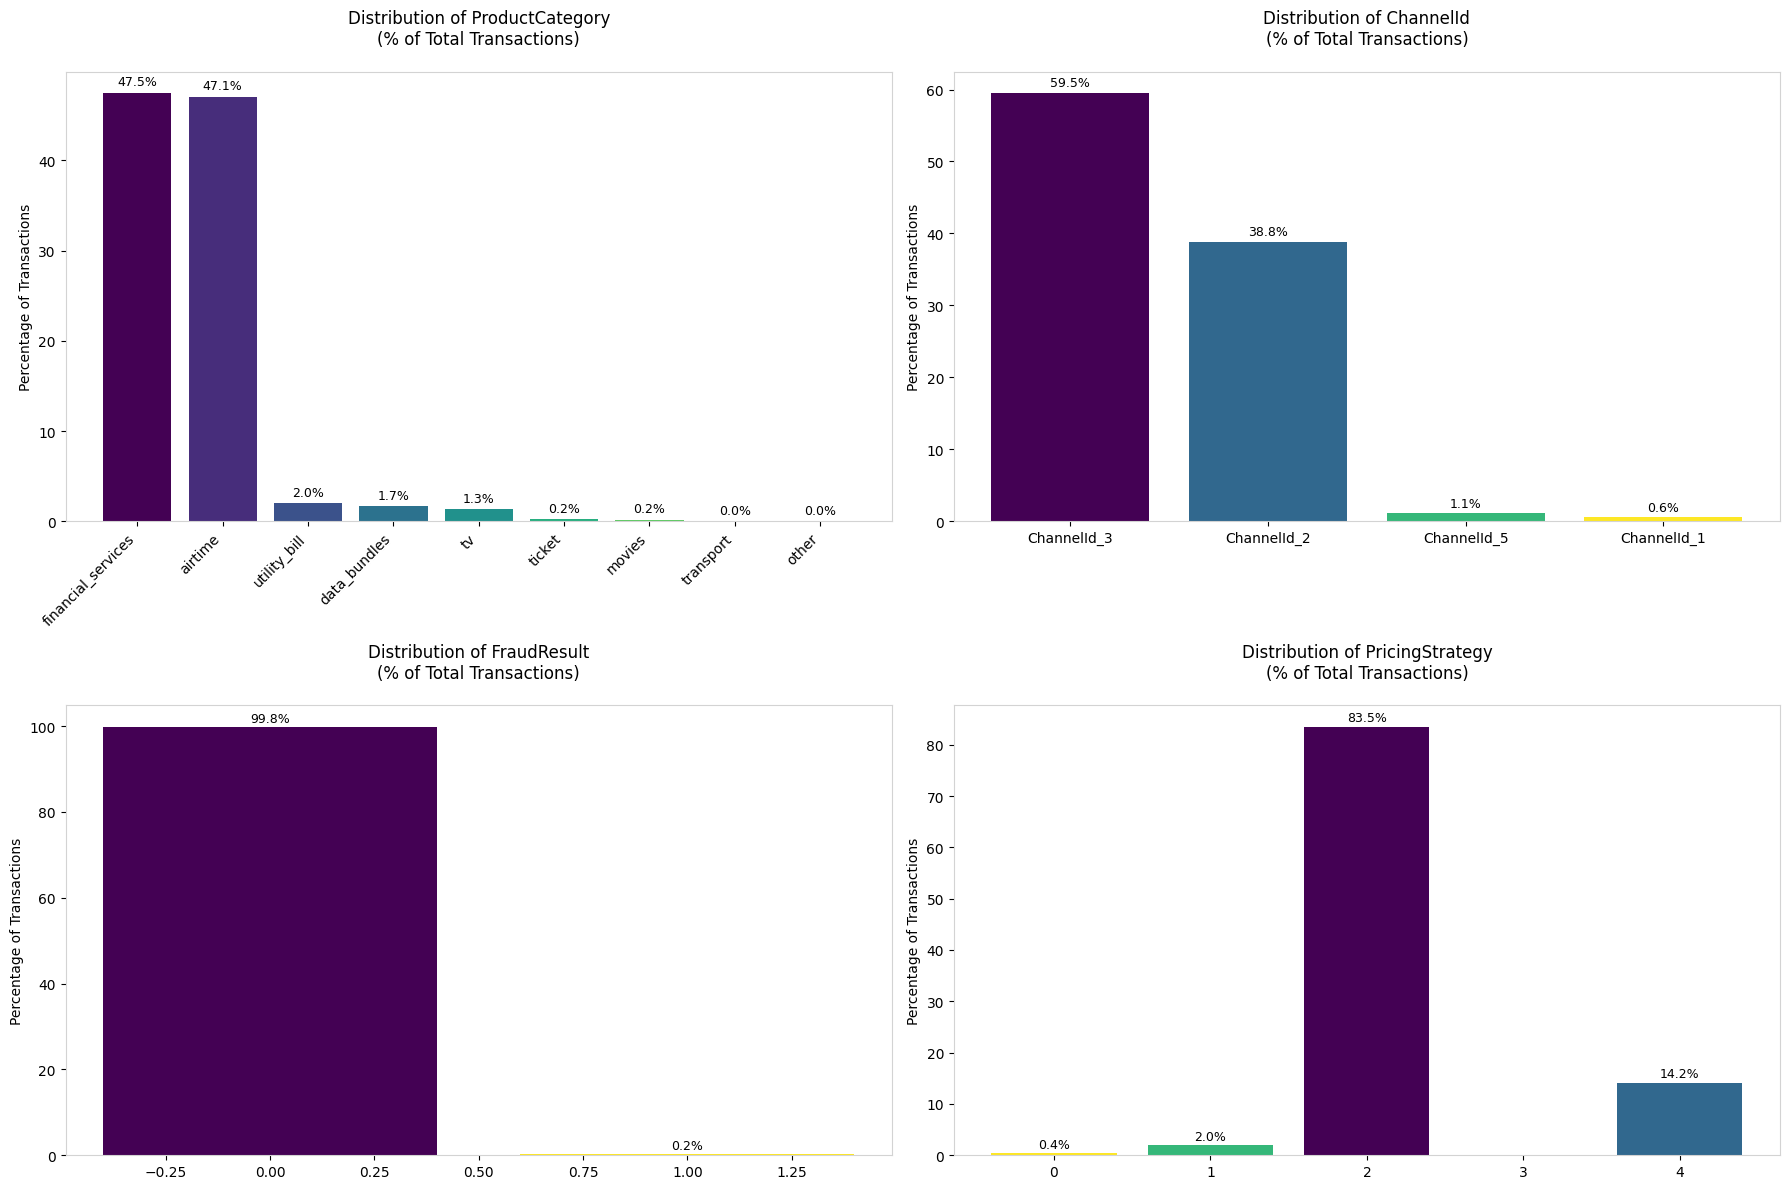

In [ ]:
# 2. Categorical distributions - Enhanced with percentages and fraud context (using Matplotlib)
cat_cols = ['ProductCategory', 'ChannelId', 'FraudResult', 'PricingStrategy']
plt.figure(figsize=(18, 12))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 2, i)
    plt.grid(False) # Removed grid lines for this subplot
    data = df1[col].value_counts(normalize=True).mul(100).sort_values(ascending=False)
    bars = plt.bar(x=data.index, height=data.values, color=plt.cm.viridis(np.linspace(0, 1, len(data)))) # Using a colormap for bars

    plt.title(f'Distribution of {col}\n(% of Total Transactions)', pad=20)
    plt.xlabel('') # Keep x-label empty as per original
    plt.ylabel('Percentage of Transactions')

    # Rotate x-labels if needed
    if len(data) > 5:
        plt.xticks(rotation=45, ha='right')
    else:
        plt.xticks(rotation=0) # Ensure no rotation if not needed

    # Add percentage labels on bars
    for bar in bars:
        height = bar.get_height()
        # Corrected: Removed xytext and textcoords, added offset directly to y-coordinate
        plt.text(bar.get_x() + bar.get_width() / 2., height + 0.5, # Added 0.5 to height for vertical offset
                 f'{height:.1f}%',
                 ha='center', va='bottom',
                 fontsize=9) # Adjust fontsize as needed

plt.tight_layout()
plt.show()

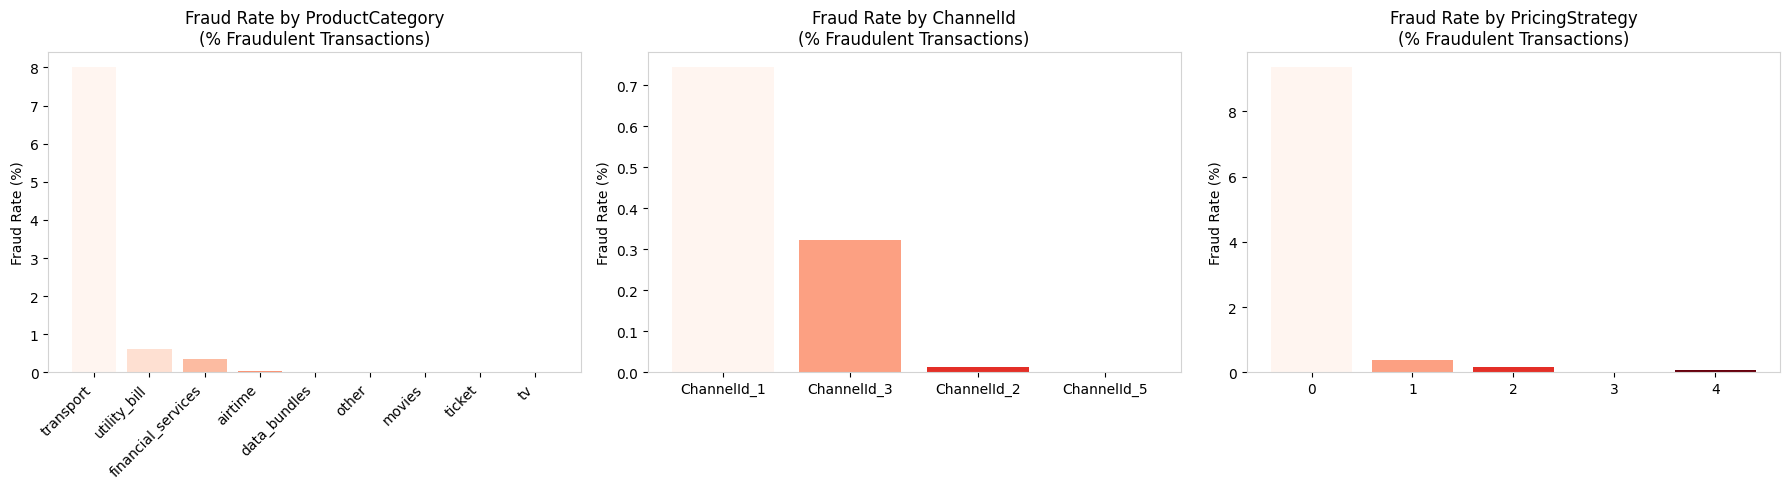

In [81]:
# 3. Special: Fraud distribution by categories (using Matplotlib)
fraud_cols = ['ProductCategory', 'ChannelId', 'PricingStrategy']
plt.figure(figsize=(18, 5)) # Updated figsize as requested

for i, col in enumerate(fraud_cols, 1):
    plt.subplot(1, 3, i)
    plt.grid(False) # Removed grid lines for this subplot

    # Calculate fraud rates per category
    fraud_rate = df1.groupby(col)['FraudResult'].mean().sort_values(ascending=False)
    bars = plt.bar(x=fraud_rate.index, height=fraud_rate.values * 100,
                   color=plt.cm.Reds(np.linspace(0, 1, len(fraud_rate))))

    plt.title(f'Fraud Rate by {col}\n(% Fraudulent Transactions)')
    plt.ylabel('Fraud Rate (%)')
    plt.xlabel('')

    if len(fraud_rate) > 5:
        plt.xticks(rotation=45, ha='right')
    else:
        plt.xticks(rotation=0) # Ensure no rotation if not needed


plt.tight_layout()
plt.show()

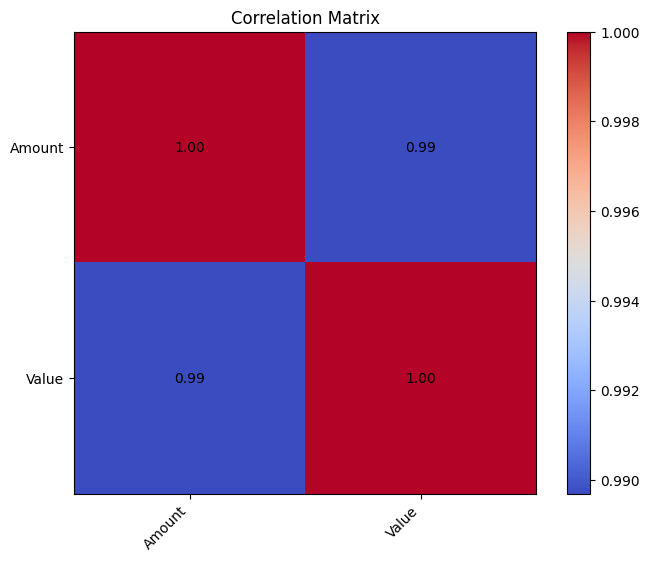

In [ ]:
# 5. Correlation analysis
num_cols = ['Amount', 'Value'] # Assuming these are your numerical columns
corr_matrix = df1[num_cols].corr()
plt.figure(figsize=(8, 6)) # Adjust figure size as needed
cax = plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(cax)
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45, ha='right')
plt.yticks(range(len(corr_matrix.index)), corr_matrix.index)
for (i, j), val in np.ndenumerate(corr_matrix):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black', fontsize=10) # Adjust color/fontsize as needed
plt.title('Correlation Matrix')
plt.show()

In [58]:

missing = df1.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0]

if not missing.empty:
    missing.plot(kind='bar', title='Missing Values by Column')
    plt.ylabel('Number of Missing Values') # Add a ylabel for clarity
    plt.xlabel('Column Name') # Add an xlabel
    plt.tight_layout() # Adjust layout to prevent labels overlapping
    plt.show()
else:
    print("No columns with missing values found in the DataFrame.")
    print("Therefore, no 'Missing Values by Column' bar plot is generated.")

No columns with missing values found in the DataFrame.
Therefore, no 'Missing Values by Column' bar plot is generated.


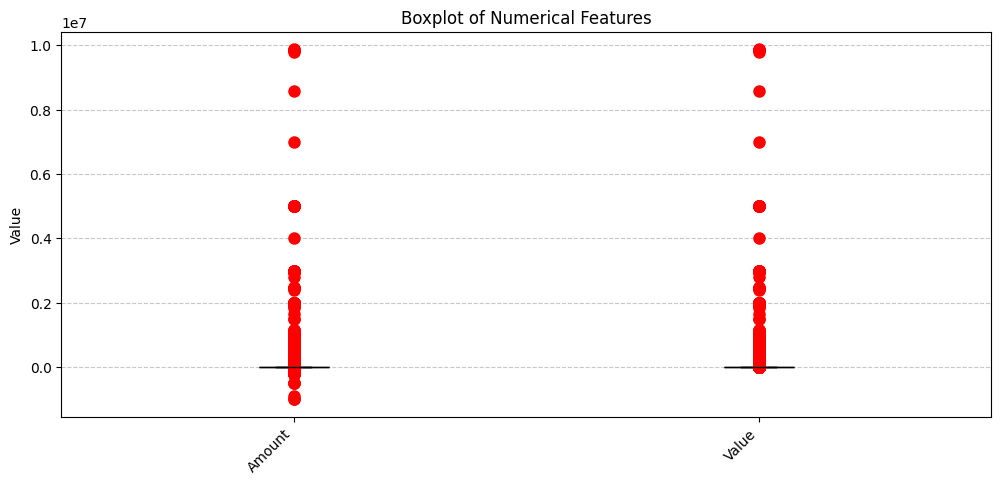

In [61]:
# 7. Outliers - Using Matplotlib for boxplots
num_cols = ['Amount', 'Value'] # Assuming these are your numerical columns

plt.figure(figsize=(12, 5))
plt.boxplot(df1[num_cols].values, patch_artist=True,  # patch_artist=True allows coloring the boxes
            boxprops=dict(facecolor='skyblue'),     # Set box color
            medianprops=dict(color='black'),        # Set median line color
            flierprops=dict(marker='o', markersize=8, markerfacecolor='red', markeredgecolor='red') # Style outliers
           )

# Set x-axis tick labels to be the column names
plt.xticks(range(1, len(num_cols) + 1), num_cols, rotation=45, ha='right')

plt.title('Boxplot of Numerical Features')
plt.ylabel('Value') # Add a y-axis label for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7) # Optional: Add horizontal grid lines
plt.show()

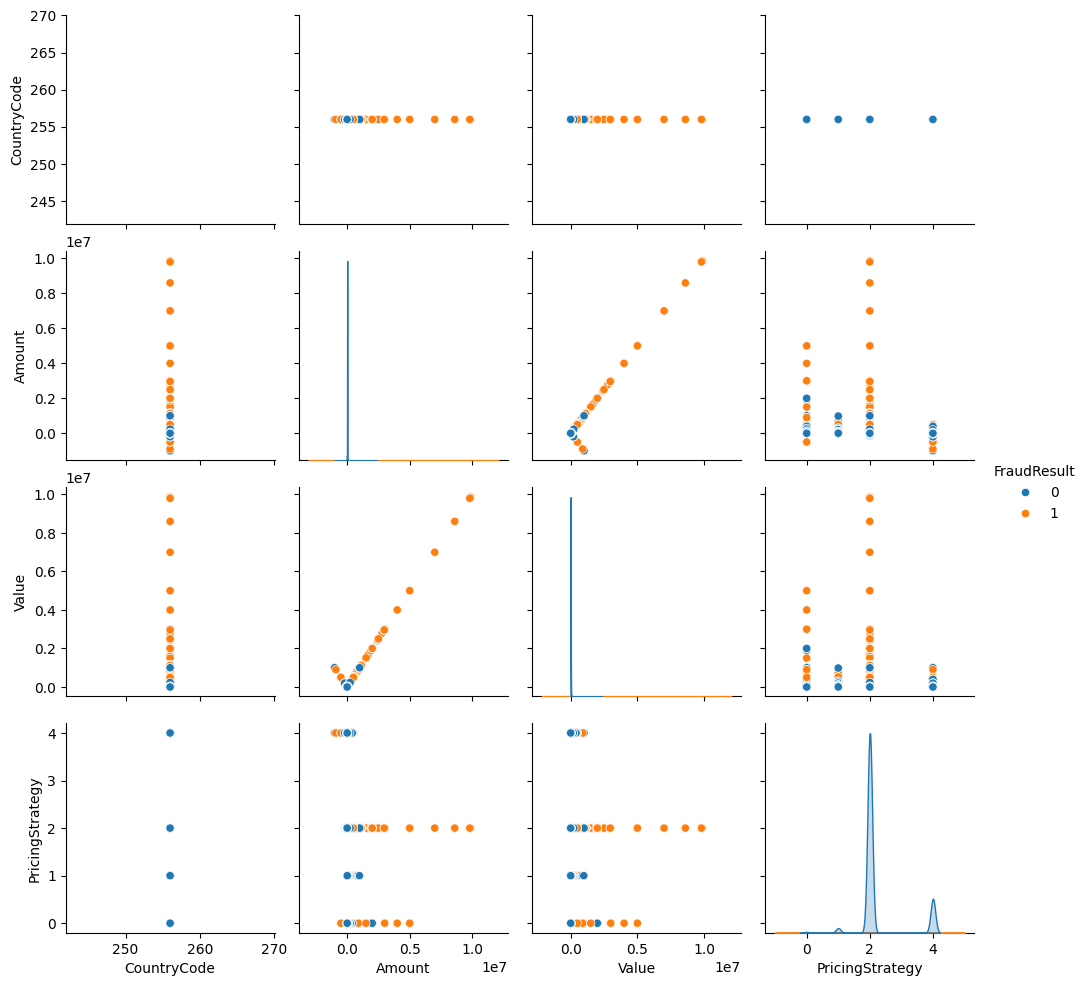

In [6]:
import seaborn as sns
# Pair plot with FraudResult as hue
sns.pairplot(df1, hue='FraudResult')
plt.show()

In [8]:
df1

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-1000.0,1000,2019-02-13T09:54:09Z,2,0
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2019-02-13T09:54:25Z,2,0
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2019-02-13T09:54:35Z,2,0
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,ProviderId_6,ProductId_19,tv,ChannelId_3,3000.0,3000,2019-02-13T10:01:10Z,2,0


In [10]:
import sidetable
df1.stb.freq(['FraudResult'], style = True)

,FraudResult,count,percent,cumulative_count,cumulative_percent
0,0,"95,469",99.80%,"95,469",99.80%
1,1,193,0.20%,"95,662",100.00%


In [11]:
df1.stb.freq(['PricingStrategy'], style = True)

,PricingStrategy,count,percent,cumulative_count,cumulative_percent
0,2,"79,848",83.47%,"79,848",83.47%
1,4,"13,562",14.18%,"93,410",97.65%
2,1,"1,867",1.95%,"95,277",99.60%
3,0,385,0.40%,"95,662",100.00%


In [13]:
df1.stb.freq(['ChannelId'], style = True)

,ChannelId,count,percent,cumulative_count,cumulative_percent
0,ChannelId_3,"56,935",59.52%,"56,935",59.52%
1,ChannelId_2,"37,141",38.83%,"94,076",98.34%
2,ChannelId_5,"1,048",1.10%,"95,124",99.44%
3,ChannelId_1,538,0.56%,"95,662",100.00%


In [14]:
# missing check
df1.stb.missing()

,missing,total,percent
TransactionId,0,95662,0.0
BatchId,0,95662,0.0
AccountId,0,95662,0.0
SubscriptionId,0,95662,0.0
CustomerId,0,95662,0.0
CurrencyCode,0,95662,0.0
CountryCode,0,95662,0.0
ProviderId,0,95662,0.0
ProductId,0,95662,0.0
ProductCategory,0,95662,0.0


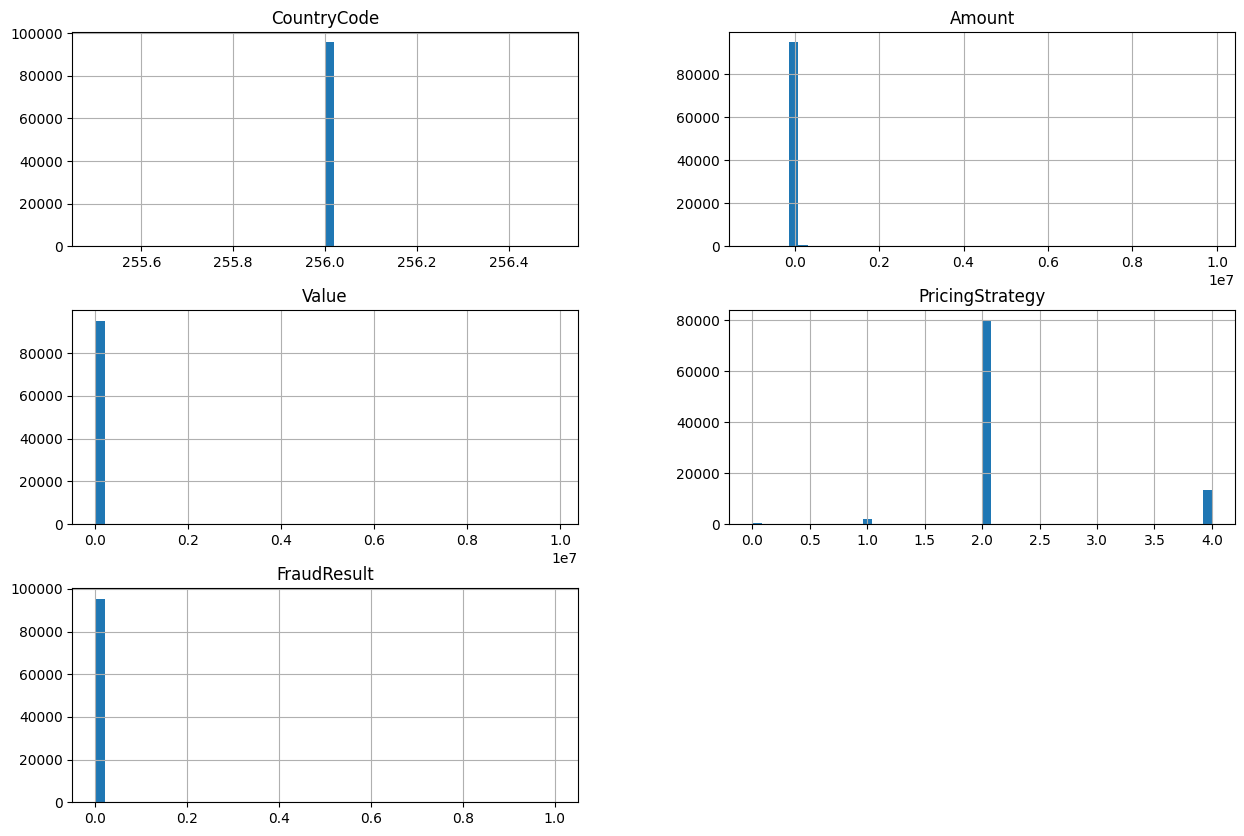

In [15]:
# distribution plots - Histograms
df_num = df1.select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize = (15, 10), bins = 50);